# Assignment 03 – Pie Chart of Email Domains

This notebook analyses a dataset of 1000 people and visualises the distribution of their email domains using a pie chart. The data is sourced from a CSV file and the chart is styled for clarity and visual appeal.


### 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd # For data manipulation – see: https://pandas.pydata.org/
import matplotlib.pyplot as plt # For plotting charts – see: https://matplotlib.org/stable/contents.html
import seaborn as sns # For enhanced plotting aesthetics – see: https://seaborn.pydata.org/
import os # For operating system interactions like file paths – see: https://docs.python.org/3/library/os.html
import requests # For downloading files from the web – see: https://docs.python-requests.org/en/latest/
from pathlib import Path # For filesystem paths – see: https://docs.python.org/3/library/pathlib.html

# Set a consistent style for plots
sns.set_theme(style="whitegrid") # Set the theme for seaborn plots – see: https://seaborn.pydata.org/generated/seaborn.set_theme.html


### 2. Download the dataset

In [2]:
# Define the direct download URL for the CSV file (hosted on Google Drive)
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

# Define the folder where the file will be saved
folder_path = "../data"  # Relative path to the data folder

# Define the full path to the output file
file_path = os.path.join(folder_path, "people.csv")  
# Reference: https://docs.python.org/3/library/os.path.html#os.path.join

# Create the data folder if it doesn't already exist
os.makedirs(folder_path, exist_ok=True)  
# Reference: https://docs.python.org/3/library/os.html#os.makedirs

# Send a GET request to download the file from the URL
response = requests.get(url)  
# Reference: https://requests.readthedocs.io/en/latest/user/quickstart/#make-a-request

# Write the downloaded content to a local file in binary mode
with open(file_path, "wb") as f:  
    f.write(response.content)  # Save the file contents to disk

# Confirm the file was saved successfully
print(f"Dataset downloaded and saved to: {file_path}")



Dataset downloaded and saved to: ../data\people.csv


### 3. Load the Data

In [3]:
# Load the CSV file into a pandas DataFrame
# This reads structured tabular data from the specified file path
df = pd.read_csv(file_path)  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# Preview the first five rows of the dataset
# Useful for checking column names, data types, and general structure
df.head()  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


### 4. Extract Email Domains


In [4]:
# Extract the domain part from each email address
# This splits the string at '@' and selects the last part (e.g., 'gmail.com' from 'user@gmail.com')
df['domain'] = df['Email'].str.split('@').str[-1]  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

# Count how many times each domain appears in the dataset
domain_counts = df['domain'].value_counts()  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

# Display the top domain counts (default is top 5)
domain_counts.head()  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.head.html



domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

# 📈 Visualisation

### 5. Generate the Pie Chart

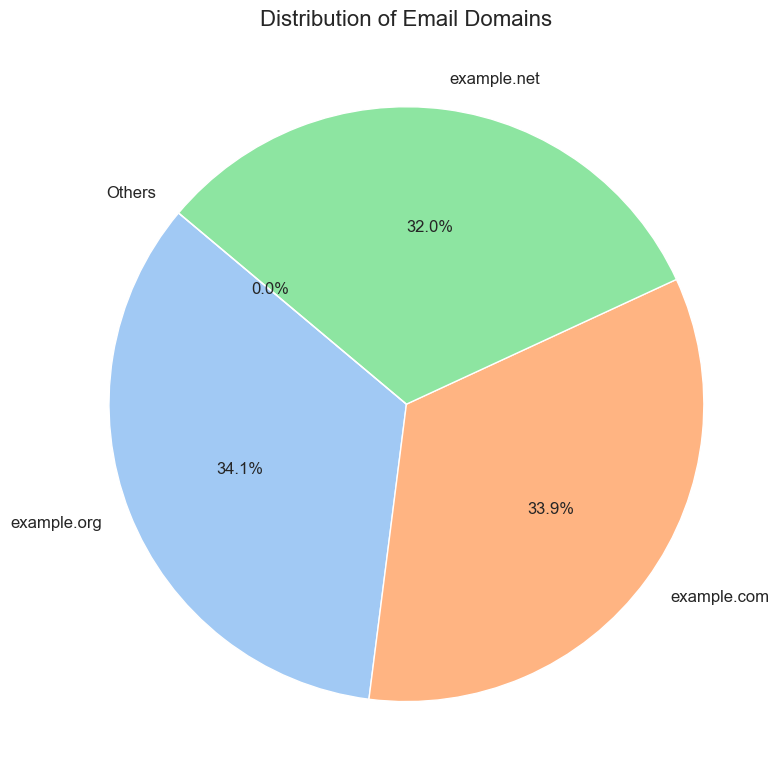

✅ Pie chart successfully saved to: C:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\plots\assignment-03-pie-chart.jpg


In [5]:
# Limit to top N domains
top_n = 10
domain_counts_top = domain_counts.head(top_n)
others = domain_counts[top_n:].sum()

# Combine top domains with "Others"
labels = list(domain_counts_top.index) + ['Others']
sizes = list(domain_counts_top.values) + [others]

# Generate pastel colour palette
colors = sns.color_palette('pastel', n_colors=len(labels))

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot pie chart using matplotlib directly
# ax.pie may return 2 or 3 items depending on matplotlib version/config (texts, and optional autotexts)
pie_result = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Unpack robustly to satisfy type checkers and handle both return shapes
if len(pie_result) == 3:
    wedges, texts, autotexts = pie_result
else:
    wedges, texts = pie_result
    autotexts = []

# Add title and layout adjustments
ax.set_title('Distribution of Email Domains', fontsize=16)
ax.axis('equal')  # Ensures pie is drawn as a circle
plt.tight_layout()

# Save the chart
out_dir = Path("../plots")
out_dir.mkdir(exist_ok=True)
out_path = out_dir / "assignment-03-pie-chart.jpg"
plt.savefig(out_path, dpi=150)

# Display and close
plt.show()
plt.close()

# Confirm save location
print(f"✅ Pie chart successfully saved to: {out_path.resolve()}")
